<img src="Figs/fga.png" alt="isolated"/>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rect_pulse(A,fs,T): 
    r""" Generate isolated rectangular pulse with the following parameters
    Parameters: 
    A : amplitude of the rectangular pulse 
    fs : sampling frequency in Hz 
    T : duration of the pulse in seconds 
    Returns: (t,g) : 
    time base (t) and the signal g(t) as tuple 
    Example:
     A = 1;
     fs=500;T = 0.2; 
     (t,g) = rect_pulse(A,fs,T) """ 
    
    t = np.arange(-0.5,0.5,1/fs) # time base 
    rect = (t >-T/2) * (t<T/2) + 0.5*(t==T/2) + 0.5*(t==-T/2)
    g = A*rect 
    return (t,g)

<h1 style="text-align: center;"> Modulações Digitais </h1>

<h3 style="text-align: center;">Disciplina: Comunicações Digitais para Engenaharia</h3>


<p style="text-align: center;">Prof. Daniel C. Araújo</p>

## Conteúdo

1. [Introdução](#Intro)
2. [Modulações sem Memória](#mod_sem_mem)

 # Introdução  <a name ="intro"></a>



## Representação de sinais digitais

* Modulação sem memória
    * Conjunto de k bits são mapeados para um símbolo

* Modulação com memória
    * Conjunto de k bits e os anteriores $(L-1)k$ bits.
    * A saída depende das sequências anteriores e a atual

<img src="Figs/mod_digi/digi_mod.png" alt="isolated" />


## transmissão de Bits

* Tempo de Símbolo e Tempo de bit

$$
T_b = \frac{T_s}{k} = \frac{T_s}{\log_2M}
$$

* Taxa de vits e taxa de símbolo

$$
R_b = kR_s = R_s \log_2M
$$

* Energia do sinal e Energia de bits

$$
E_{avg} = \sum _{m=1}^{M} p_m E_m 
$$
em que, $p_m$ são as probabilidades dos símbolos

Se os bits são equiprováveis então:

$$
E_{b} = \frac{E_{avg}}{\log_2M}  
$$

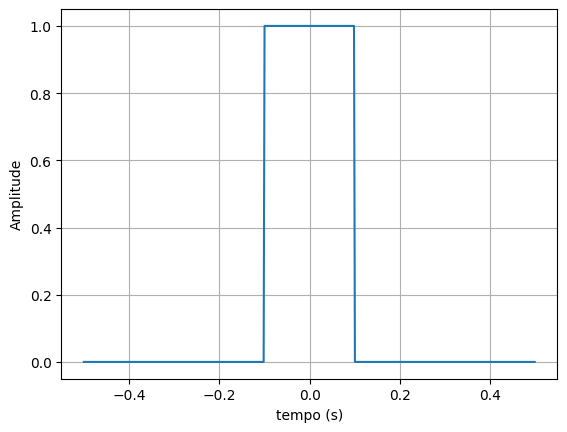

Tempo de bit 0.2 s
Taxa de bits 5.0 Hz


In [10]:
A = 1
fs=500
Tb = 0.2 
(t,g) = rect_pulse(A,fs,Tb) 

plt.plot(t,g)
plt.xlabel("tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

print("Tempo de bit", Tb, "s")
print("Taxa de bits", 1/Tb, "Hz")

# Modulações sem Memória  <a name="mod_sem_mem"></a>

## Modulação PAM

> Definição: Pulse Modulation Amplitude (PAM/ASK)

* forma de onda

   $$
    s_m(t) = A_m p(t), \,\  0 \leq m \leq M - 1
   $$

* Amplitudes 

  $$
  A_m = 2m + 1 - M 
  $$

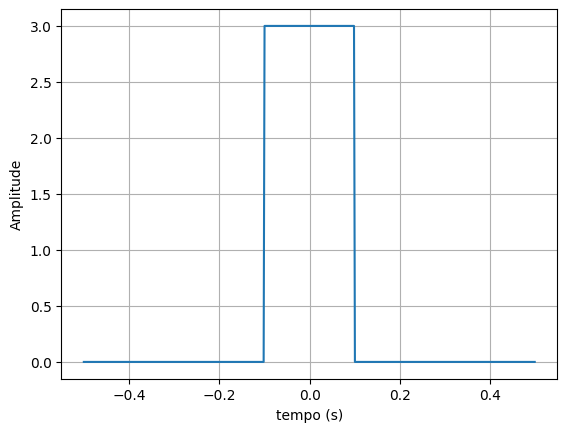

Tempo de bit 0.2 s
Taxa de bits 5.0 Hz


In [32]:
def mod_am(integer, M,fs,Tb):

    A_m = 2*integer  - M + 1

    return rect_pulse(A_m,fs,Tb)

A = 1
fs=500
Tb = 0.2 
M = 4
integer = 3    # integer < M
(t,g) = mod_am(integer, M,fs,Tb) 

plt.plot(t,g)
plt.xlabel("tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

print("Tempo de bit", Tb, "s")
print("Taxa de bits", 1/Tb, "Hz")

## Energia do símbolo

$$
\begin{align*}
    E_s   & = \int _{-\infty}^{\infty} |s_m(t)|^2 dt \\
         & = \int _{-\infty}^{\infty} A^2_m p(t)^2 dt \\
         &  = A^2_m E_p 
\end{align*}
$$

## Energia média da constelação
$$
\begin{align*}
    E_{avg}   & = \frac{E_p}{M} \sum _{m=1}^{M}A^2_m \\
              & = \frac{2E_p}{M} \left(1 + 3^2 + \ldots + (M-1)^2 \right) \\
              & = \frac{2E_p}{M} \frac{M(M^2-1)}{6} \\
              & = \frac{E_p(M^2-1)}{3}
\end{align*}  
$$
Portanto a energia média de bits

$$
E_{b} = \frac{E_{avg}}{\log_2M}  = \frac{E_p(M^2-1)}{3\log_2M}
$$

## Representação em Banda Básica e Banda Passante

Assumindo que a representação de banda-básica seja 

$$
s_{ml} = A_m p(t)
$$
em que $p(t)$ é real

então sua representação de banda-passante é

$$
\begin{align*}
s_m(t) &= A_m p(t) \cos (2\pi f_c t) \\
       &= A_m g(t)
\end{align*}  
$$

* A energia média de banda-passante será metade da energia de banda-básica:

$$
E_{b} = \frac{E_p(M^2-1)}{6\log_2M}
$$

## Símbolo PAM

* A representação de banda-básica pode ser reescrita como

$$
s_ml(t) =  A_m \sqrt{E_p} \phi(t),
$$
em que $\phi (t) = \frac{p(t)}{\sqrt{E_p}}$.

* Símbolos PAM

 $$
 s_m  =  A_m \sqrt{E_p} , \,\ A_m =\{\pm 1, \pm 3, \ldots , \pm (M - 1)\}
 $$



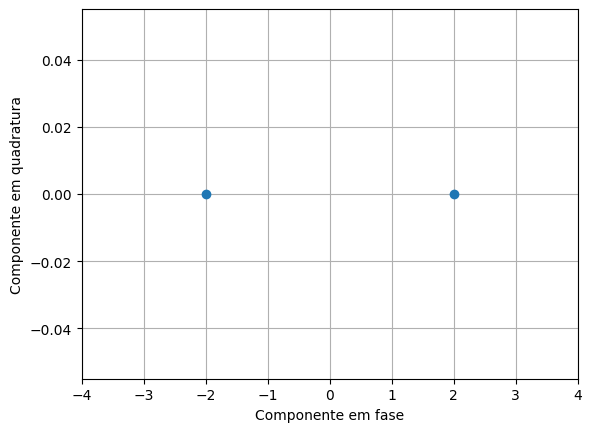

In [52]:
M = 2   # Ordem da modulação
m = np.arange(0,M)
Ep = 4

smr = (2*m - M + 1) * np.sqrt(Ep)
smi = np.zeros(len(smr))

plt.plot(smr,smi,'o')
plt.xlabel('Componente em fase')
plt.ylabel('Componente em quadratura')
plt.xlim([np.min(smr) - np.sqrt(Ep),np.max(smr) + np.sqrt(Ep)])
plt.grid()
plt.show()

## Distância Entre Símbolos da Modulação AM

* Considere a distância euclidiana entre dois pontos 

$$
\begin{align*}
d_{nm} & = \sqrt{|s_m - s_n|^2} \\
& = |A_m - A_n|\sqrt{E_p} \\
\end{align*}
$$

Portanto a distância mínima entre dois símbolos será:

$$
\begin{align*}
d_{min} & = 2\sqrt{E_p} \\
& = \sqrt{2E_g} \\ 
& = \sqrt{\frac{12\log_2M}{M^2-1}E_b} 
\end{align*}
$$

## Exercício

* Programar um modulador M-PAM 
    * Obter a scatterplot na saída do modulador
    * Sinal de banda-básica
        * Considere o pulso retangular
    * Sinal de banda–passante
